In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('EcommerceData.csv',encoding= "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df = df.dropna()
df.shape

(406829, 8)

In [6]:
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate,format = '%m/%d/%Y %H:%M')
df.head()


/opt/conda/envs/py3.7.6-tf1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.insert(loc = 5,column = 'Year_Month', value = df['InvoiceDate'].map(lambda x: 100 * x.year + x.month))
df.insert(loc = 6,column = 'Month', value = df.InvoiceDate.dt.month)
df.insert(loc=7,column='Day',value= (df.InvoiceDate .dt.dayofweek)+1)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,201012,12,3,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,201012,12,3,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom


In [8]:
df['TotalPrice'] = df['Quantity'] * df ['UnitPrice']
df.head()

/opt/conda/envs/py3.7.6-tf1.13.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Year_Month,Month,Day,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,201012,12,3,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,201012,12,3,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,201012,12,3,3.39,17850.0,United Kingdom,20.34


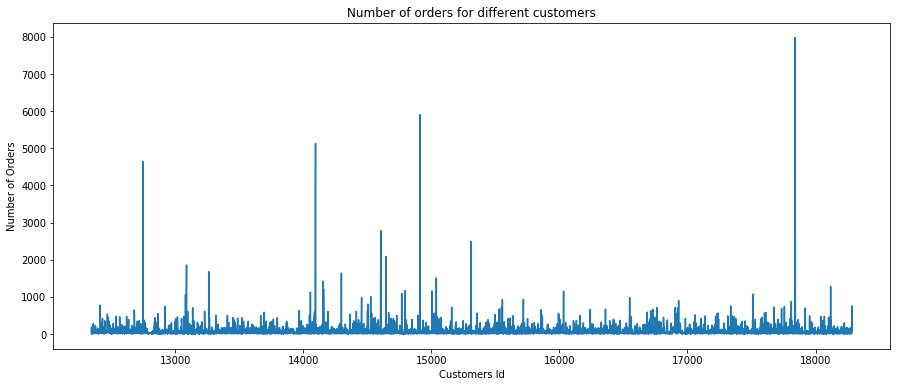

In [11]:
orders = df.groupby(by=['CustomerID'],as_index=False)['InvoiceNo'].count()
plt.subplots(figsize = (15,6))
plt.plot (orders .CustomerID,orders.InvoiceNo)
plt.xlabel('Customers Id')
plt.ylabel('Number of Orders')
plt.title('Number of orders for different customers')
plt.show()

Text(0.5, 1.0, 'Money Spent for different Customers')

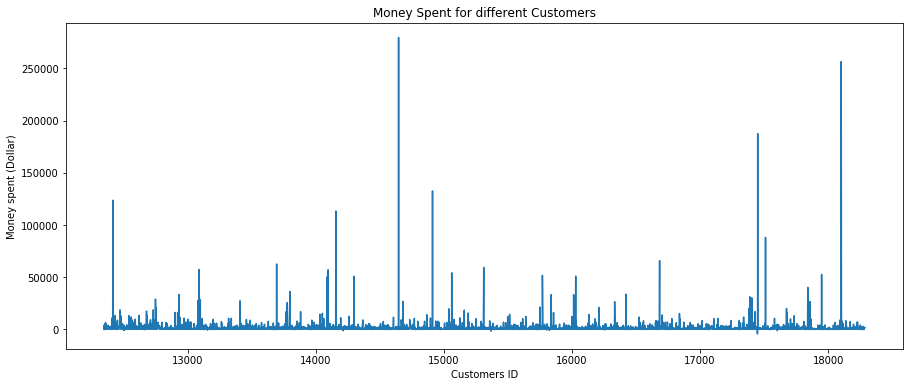

In [14]:
money_spent = df.groupby(by =['CustomerID'], as_index =False) ['TotalPrice'].sum()
plt.subplots(figsize=(15,6))
plt.plot (money_spent.CustomerID,money_spent.TotalPrice)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')


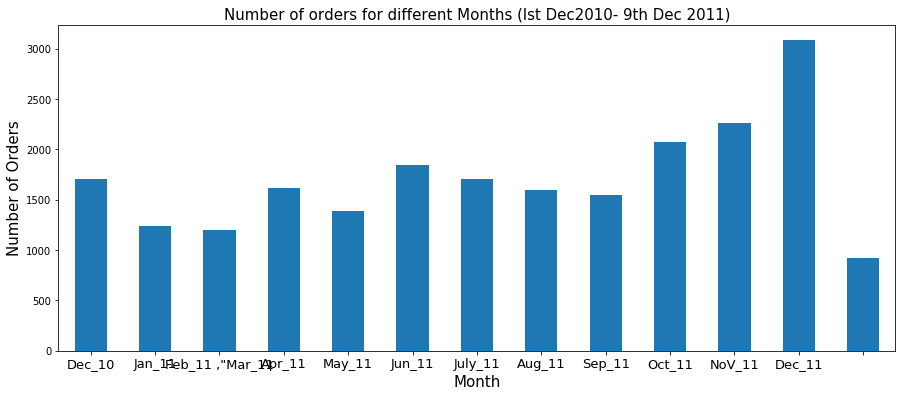

In [17]:
ax = df.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index().plot(kind='bar' , figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders' , fontsize=15)
ax.set_title( 'Number of orders for different Months (lst Dec2010- 9th Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11 ,"Mar_11','Apr_11','May_11','Jun_11','July_11' ,'Aug_11','Sep_11','Oct_11','NoV_11','Dec_11'),rotation='horizontal',fontsize=13)
plt.show()


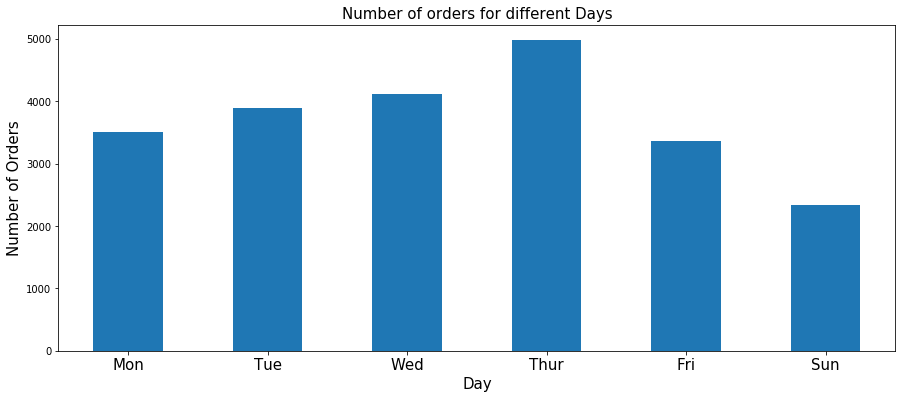

In [21]:
ax = df.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day', fontsize=15)
ax.set_ylabel('Number of Orders' , fontsize=15)
ax.set_title( 'Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon' ,'Tue' ,'Wed', 'Thur' ,'Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
#获取特征列和标签列数据，切分为训练集和测集
X = df[['UnitPrice', 'TotalPrice', 'CustomerID']]
y = df['Quantity']
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.10)


In [32]:
#线性回归模型L inear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
pred_reg = linreg. predict(X_test)
score_linreg_per = linreg.score(X_test, y_test)*100
print(f'Linear Regression Model Score: {score_linreg_per}%')
val_mae_linreg = mean_absolute_error(pred_reg, y_test)
print(f'The quantity is off by: {val_mae_linreg}(MAE)')


Linear Regression Model Score: 92.96064654486969%
The quantity is off by: 10.492289819038785(MAE)


In [36]:
#随机森林回归RandomForestRegressor
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
pred_rfg = rfg.predict(X_test)
score_rfg_per = rfg.score(X_test, y_test) * 100
print(f'Random Forest Regressor Model Score: {score_rfg_per}%')
val_mae_rfg = mean_absolute_error(pred_rfg,y_test)
print(f'The quantity is off by: {val_mae_rfg} (MAE)')


/opt/conda/envs/py3.7.6-tf1.13.1/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regressor Model Score: 62.32125063572346%
The quantity is off by: 1.56094978246442 (MAE)
